In [7]:
import pandas as pd
df = pd.read_csv("movies.csv")
print(df.head())
#print(df.info())
#print(df.describe())

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nic

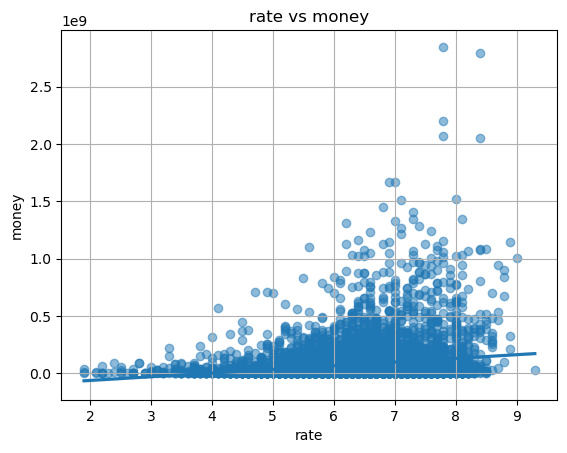

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
df_clean= df.dropna(subset=['score','gross'])

sns.regplot(x='score',y='gross',data=df_clean,scatter_kws={'alpha':0.5})
plt.xlabel("rate")
plt.ylabel("money")
plt.title("rate vs money")
plt.grid(True)
plt.show()

In [9]:
high_score = df_clean[df_clean['score']>8]
print("高評分電影票房: ",high_score['gross'].mean())

高評分電影票房:  237923034.20855615


C:\Users\cizhu\AppData\Local\Temp\ipykernel_8204\1328957947.py:13: UserWarning: Glyph 38651 (\N{CJK UNIFIED IDEOGRAPH-96FB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8204\1328957947.py:13: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8204\1328957947.py:13: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8204\1328957947.py:13: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8204\1328957947.py:13: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8204\1328957947.py:13: UserWarning: Glyph 22343 (\N{CJK 

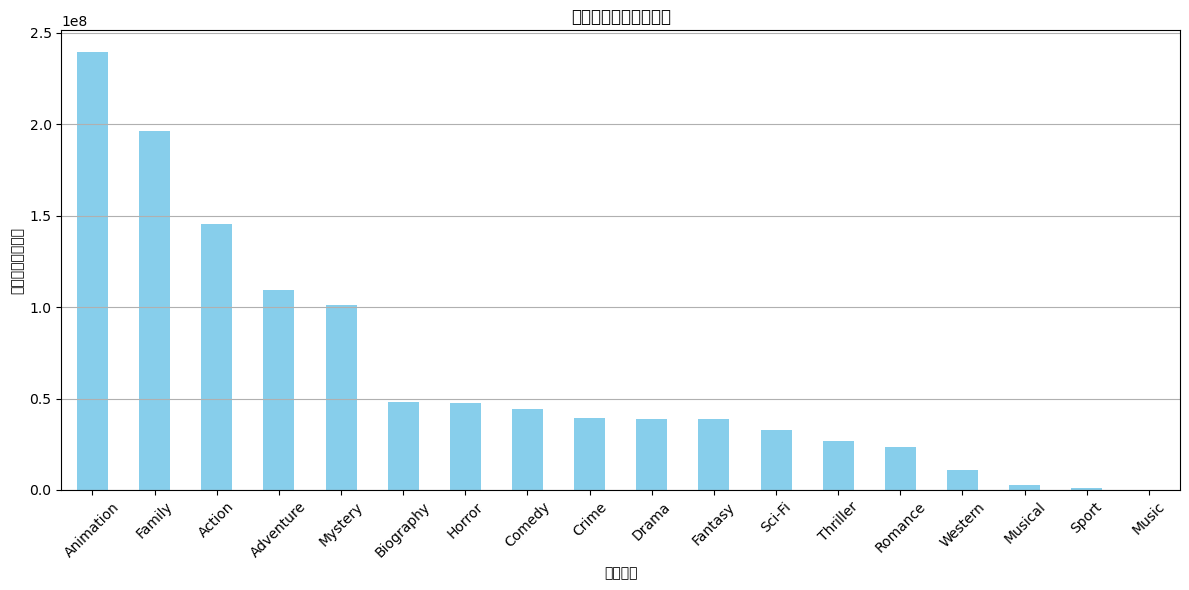

In [10]:
df_clean = df.dropna(subset=['genre', 'gross']).copy()
df_clean['genre'] = df_clean['genre'].str.split('|')

df_genre = df_clean.explode('genre')

genre_mean = df_genre.groupby('genre')['gross'].mean().sort_values(ascending=False)

genre_mean.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("各電影類型的平均票房")
plt.xlabel("電影類型")
plt.ylabel("平均票房（美元）")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

C:\Users\cizhu\AppData\Local\Temp\ipykernel_8204\1050994879.py:17: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8204\1050994879.py:17: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8204\1050994879.py:17: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8204\1050994879.py:17: UserWarning: Glyph 35413 (\N{CJK UNIFIED IDEOGRAPH-8A55}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8204\1050994879.py:17: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cizhu\AppData\Local\Temp\ipykernel_8204\1050994879.py:17: UserWarning: Glyph 20302 (\N{CJK 

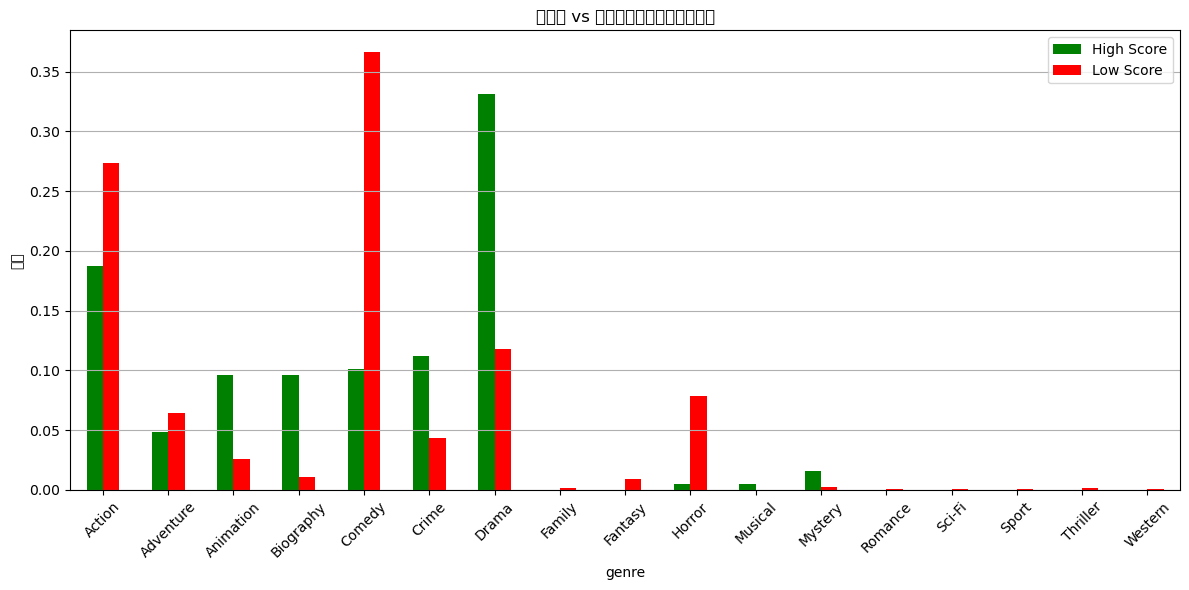

In [11]:
high = df_genre[df_genre['score'] > 8]
low = df_genre[df_genre['score'] < 6]

high_count = high['genre'].value_counts(normalize=True)
low_count = low['genre'].value_counts(normalize=True)

compare_df = pd.DataFrame({
    'High Score': high_count,
    'Low Score': low_count
}).fillna(0)

compare_df.plot(kind='bar', figsize=(12, 6), color=['green', 'red'])
plt.title("高評分 vs 低評分電影在各類型的分布")
plt.ylabel("比例")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
